<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

--2024-03-13 02:11:31--  http://weight_height.csv/
Resolving weight_height.csv (weight_height.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘weight_height.csv’
--2024-03-13 02:11:31--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428122 (418K) [text/plain]
Saving to: ‘weight_height.csv’

weight_height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.04s   

2024-03-13 02:11:31 (11.3 MB/s) - ‘weight_height.csv’ saved [428122/428122]

FINISHED --2024-03-13 02:11:31--
Total wall clock time: 0.3s
Downloaded: 1 files, 418K in 0.04s (11.3 MB/s)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [3]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv("weight_height.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean()) * 100
des

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699
Nan,0.000000,0.000000
%Nan,0.000000,0.000000


In [4]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
df_clean = df.copy()
df_clean.dropna(subset=['Height'], inplace=True)
df_clean.dropna(subset=['Weight'], inplace=True)
df_clean.shape

(10000, 3)

In [5]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df_clean.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)
df2 = pd.DataFrame()
df2['peso'] = df_clean['Weight'].apply(lambda x: x / 2.20462)
df2['altura'] = df_clean['Height'].apply(lambda x: x / 39.37007)
df2['sexo'] = df_clean['Gender'].apply(lambda x: 'masculino' if x=='Male' else 'femenino')
df2.head()

,peso,altura,sexo
0,109.721205,1.875715,masculino
1,73.622879,1.747061,masculino
2,96.497744,1.882397,masculino
3,99.809704,1.821967,masculino
4,93.598806,1.774998,masculino


In [7]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
df2.shape[0]

10000

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

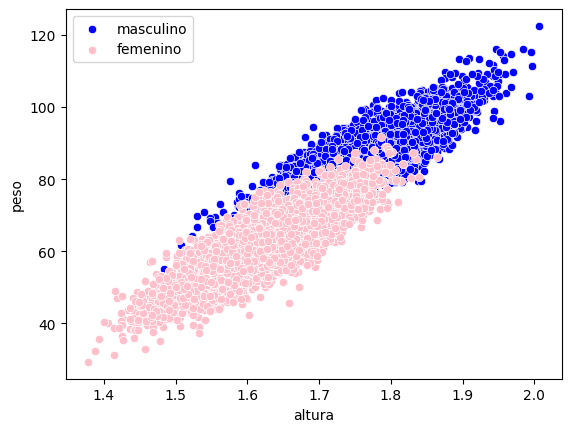

In [8]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos
fig = plt.figure()
ax = fig.add_subplot()
sns.scatterplot(ax=ax, x=df2[df2['sexo']=='masculino']['altura'], y=df2[df2['sexo']=='masculino']['peso'], color='blue', label='masculino')
sns.scatterplot(ax=ax, x=df2[df2['sexo']=='femenino']['altura'], y=df2[df2['sexo']=='femenino']['peso'], color='pink', label='femenino')
plt.show()

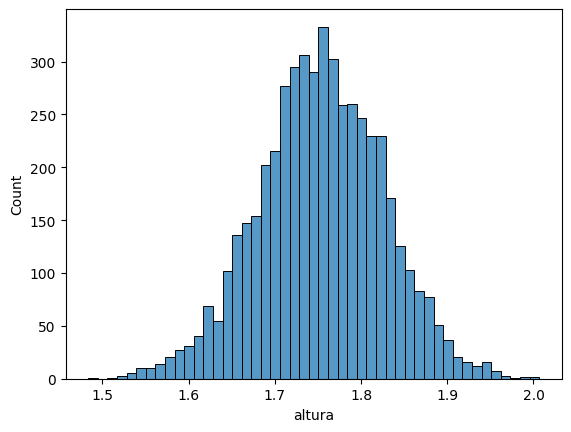

Altura Promedio en Hombres(mts): 1.7532695752437686


In [9]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
sns.histplot(data=df2[df2["sexo"]=="masculino"], x="altura")
plt.show()
print("Altura Promedio en Hombres(mts):", df2[df2["sexo"]=="masculino"]["altura"].mean())

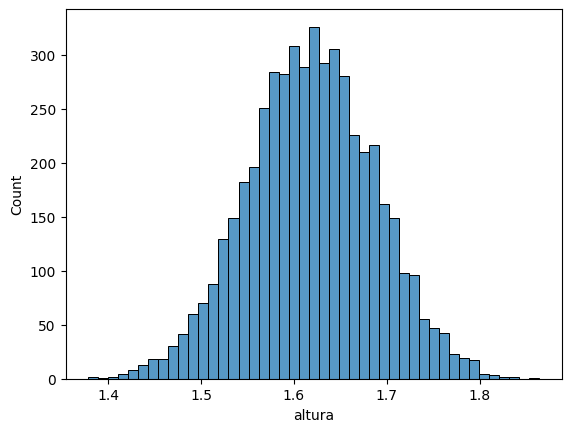

Altura Promedio en Mujeres(mts): 1.618203208768109


In [10]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
sns.histplot(data=df2[df2["sexo"]=="femenino"], x="altura")
plt.show()
print("Altura Promedio en Mujeres(mts):", df2[df2["sexo"]=="femenino"]["altura"].mean())

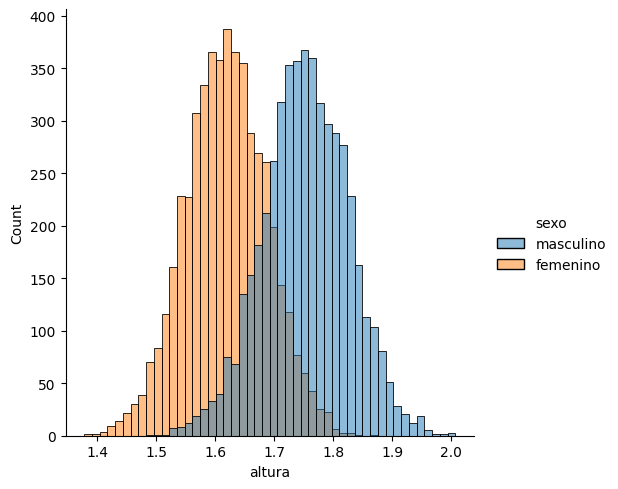

In [11]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"
sns.displot(data=df2, x="altura", hue="sexo")
plt.show()

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Entrenar modelo de regresión lineal masculino
X_m = df2[df2["sexo"]=="masculino"][["peso"]].values
y_m = df2[df2["sexo"]=="masculino"]["altura"].values
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.3, random_state=42)

lr_m = LinearRegression()
lr_m.fit(X_train_m, y_train_m)
y_hat_m = lr_m.predict(X_test_m)

# Entrenar modelo de regresión lineal femenino
X_f = df2[df2["sexo"]=="femenino"][["peso"]].values
y_f = df2[df2["sexo"]=="femenino"]["altura"].values
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.3, random_state=42)

lr_f = LinearRegression()
lr_f.fit(X_train_f, y_train_f)
y_hat_f = lr_f.predict(X_test_f)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [93]:
from sklearn.metrics import r2_score

# Calcular r2_score de modelo masculino
value_m = r2_score(y_test_m, y_hat_m)
print(f"Coeficiente de determinación Modelo Masculino: {value_m:.2f}")

# Calcular r2_score de modelo femenino
value_f = r2_score(y_test_f, y_hat_f)
print(f"Coeficiente de determinación Modelo Femenino: {value_f:.2f}")

Coeficiente de determinación Modelo Masculino: 0.75
Coeficiente de determinación Modelo Femenino: 0.73


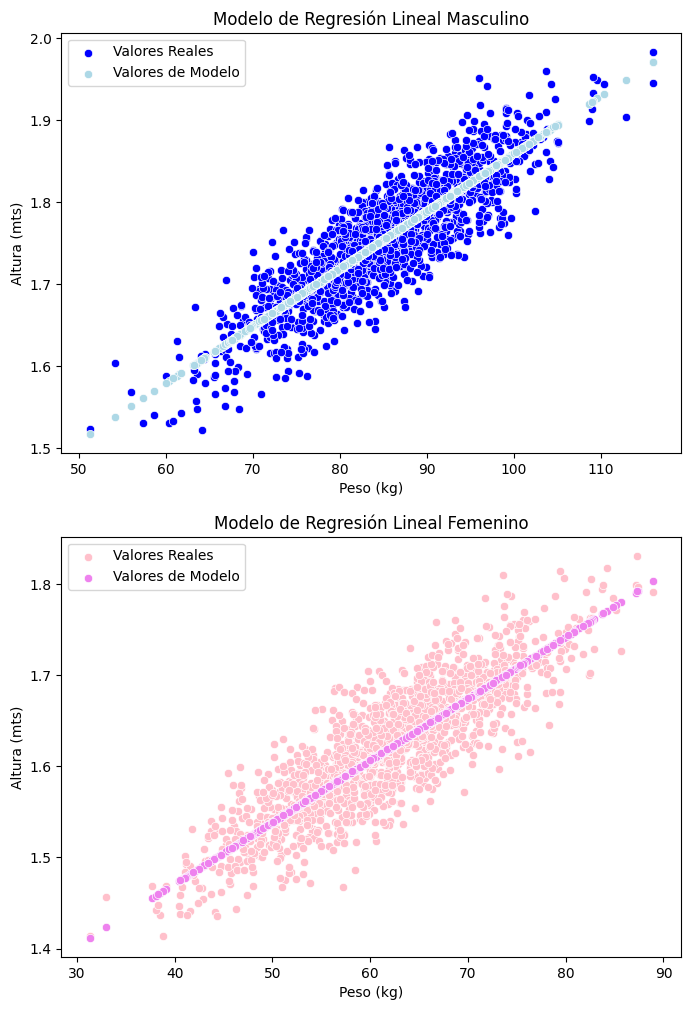

In [104]:
# Gráfico del resultado de la regresión sobre los datos de entrada
fig = plt.figure(figsize=(8,12))
ax = fig.subplots(2,1)

# Graficar modelo masculino
ax[0].set(xlabel="Peso (kg)", ylabel="Altura (mts)", title="Modelo de Regresión Lineal Masculino")
sns.scatterplot(ax=ax[0], x=X_test_m.flatten(), y=y_test_m, color="blue", label="Valores Reales")
sns.scatterplot(ax=ax[0], x=X_test_m.flatten(), y=y_hat_m, color="lightblue", label="Valores de Modelo")

# Graficar modelo femenino
ax[1].set(xlabel="Peso (kg)", ylabel="Altura (mts)", title="Modelo de Regresión Lineal Femenino")
sns.scatterplot(ax=ax[1], x=X_test_f.flatten(), y=y_test_f, color="pink", label="Valores Reales")
sns.scatterplot(ax=ax[1], x=X_test_f.flatten(), y=y_hat_f, color="violet", label="Valores de Modelo")
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [97]:
m2 = np.array([60])
y_hat_prueba_m = lr_m.predict(m2.reshape(-1, 1))
print(f"Según el modelo de regresión lineal, un hombre que pesa 60 kilos debe medir {y_hat_prueba_m[0]:.2f} metros")
y_hat_prueba_f = lr_f.predict(m2.reshape(-1, 1))
print(f"Según el modelo de regresión lineal, una mujer que pesa 60 kilos debe medir {y_hat_prueba_f[0]:.2f} metros")

Según el modelo de regresión lineal, un hombre que pesa 60 kilos debe medir 1.58 metros
Según el modelo de regresión lineal, una mujer que pesa 60 kilos debe medir 1.61 metros
